<a href="https://colab.research.google.com/github/alirezasaharkhiz9/undergraduate-project-computer-vision/blob/main/ObjectDetectionUsingYOLOv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ObjectDetectionUsingYOLOv5

## Train Yolov5 model

In [ ]:
ls

 AutoEncoderWithKeras.ipynb*                  dataset/
 Chest-X-Ray/                                 dogs-vs-cats.zip*
'EfficientNetB0-100-(224 X 224)- 97.59.h5'*   inception_training.h5*
 EutoEncoderWithKeras.h5*                    'landscape Images'/
 Game.ipynb*                                  landscape-image-colorization.zip*
 GanWithPytorch.ipynb*                        lightning_logs/
 LungsSegmentationUsingU-Net.h5*              lungvision.zip*
 LungsSegmentationUsingU_Net.ipynb*           resnet.h5*
 MetaData.csv*                                test/
 YOLOv5.ipynb                                 train/
'butterflies and moths.csv'*                  training.csv.csv*
 butterfly-images40-species.zip*              valid/
 chest-x-ray-lungs-segmentation.zip*


In [ ]:
import os
os.chdir('/teamspace/studios/this_studio/YOLOv5')

In [ ]:
ls

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...



In [ ]:
import os
os.chdir('/teamspace/studios/this_studio/YOLOv5/yolov5')

In [ ]:
ls

CITATION.cff     README.zh-CN.md  detect.py   pyproject.toml    tutorial.ipynb
CONTRIBUTING.md  benchmarks.py    export.py   requirements.txt  utils/
LICENSE          classify/        hubconf.py  segment/          val.py
README.md        data/            models/     train.py


In [ ]:
!kaggle datasets download -d princekhunt19/road-detection-imgs-and-labels

Dataset URL: https://www.kaggle.com/datasets/princekhunt19/road-detection-imgs-and-labels
License(s): CC0-1.0
 99%|████████████████████████████████████████▌| 249M/252M [00:01<00:00, 140MB/s]
100%|█████████████████████████████████████████| 252M/252M [00:01<00:00, 134MB/s]


In [ ]:
# ! unzip /teamspace/studios/this_studio/YOLOv5/yolov5/road-detection-imgs-and-labels.zip

In [ ]:
ls

CITATION.cff*     dataset/           road-detection-imgs-and-labels.zip*
CONTRIBUTING.md*  dataset.yaml*      segment/
LICENSE*          detect.py*         train.py*
README.md*        export.py*         tutorial.ipynb*
README.zh-CN.md*  hubconf.py*        utils/
benchmarks.py*    models/            val.py*
classify/         pyproject.toml*
data/             requirements.txt*


In [ ]:
!pip install -r requirements.txt -q

In [ ]:
!python train.py --data dataset.yaml --cfg yolov5s.yaml --batch-size 16 --name Model --epochs 100

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/teamspace/studios/this_studio/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2024-12-30 20:23:01.839315: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-30 20:23:01.890750: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-30 20:23:01.905364: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cf

In [ ]:
!python export.py --weights runs/train/Model/weights/best.pt --include torchscript onnx

export: data=data/coco128.yaml, weights=['runs/train/Model/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=False, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['torchscript', 'onnx']
YOLOv5 🚀 v7.0-390-g0797106a Python-3.10.10 torch-2.2.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7034398 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/Model/weights/best.pt with output shape (1, 25200, 14) (13.8 MB)

TorchScript: starting export with torch 2.2.1+cu121...
TorchScript: export success ✅ 1.2s, saved as runs/train/Model/weights/best.torchscript (27.3 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 147.4 MB/s 

## Result

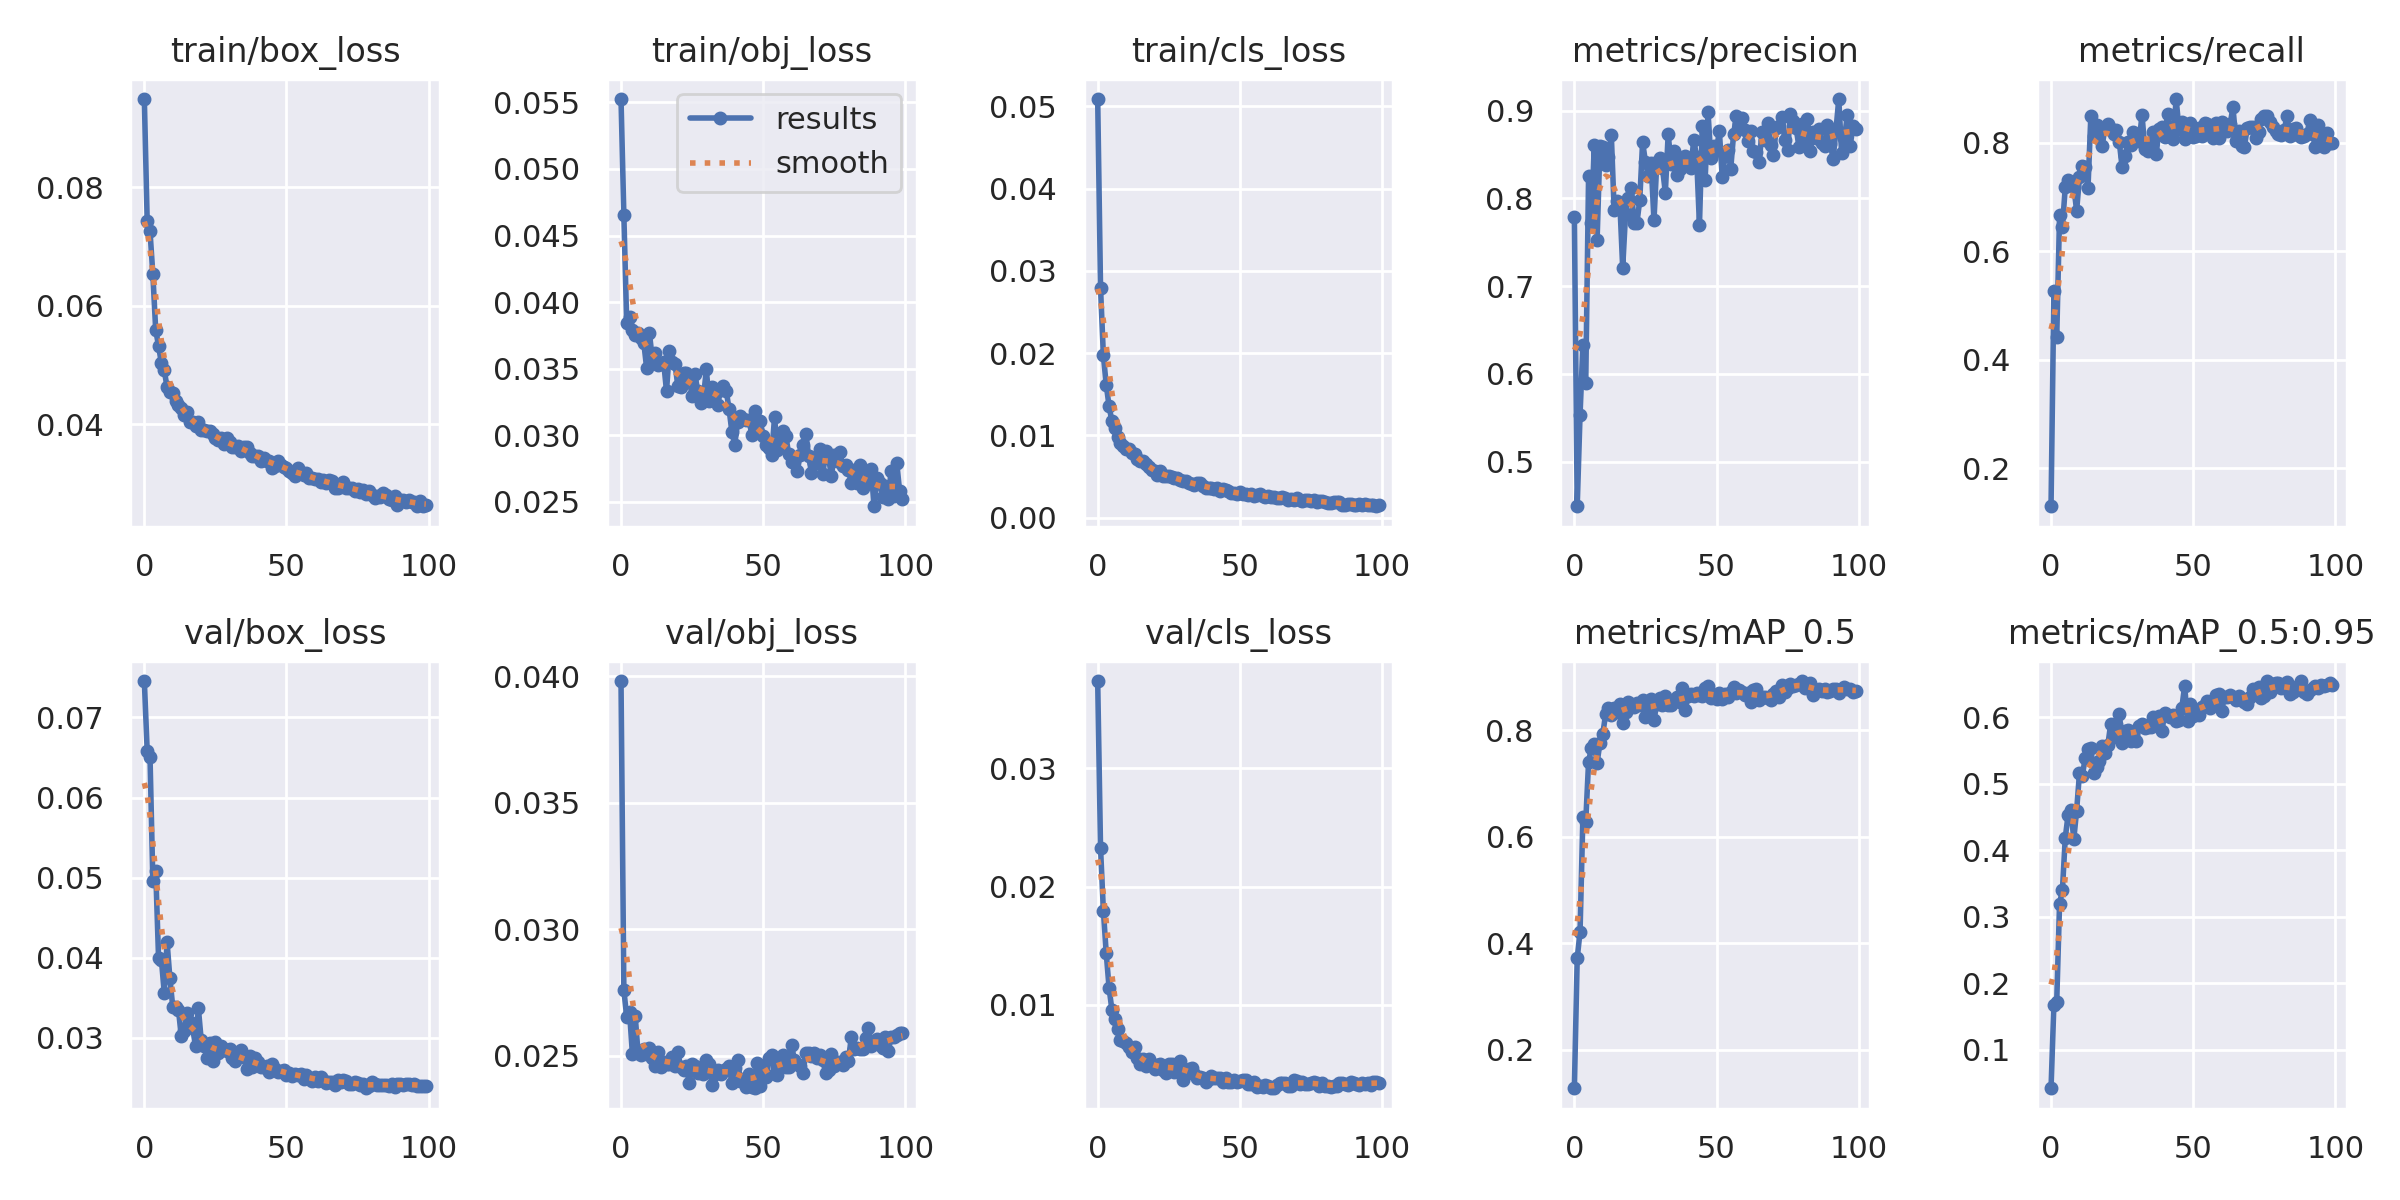

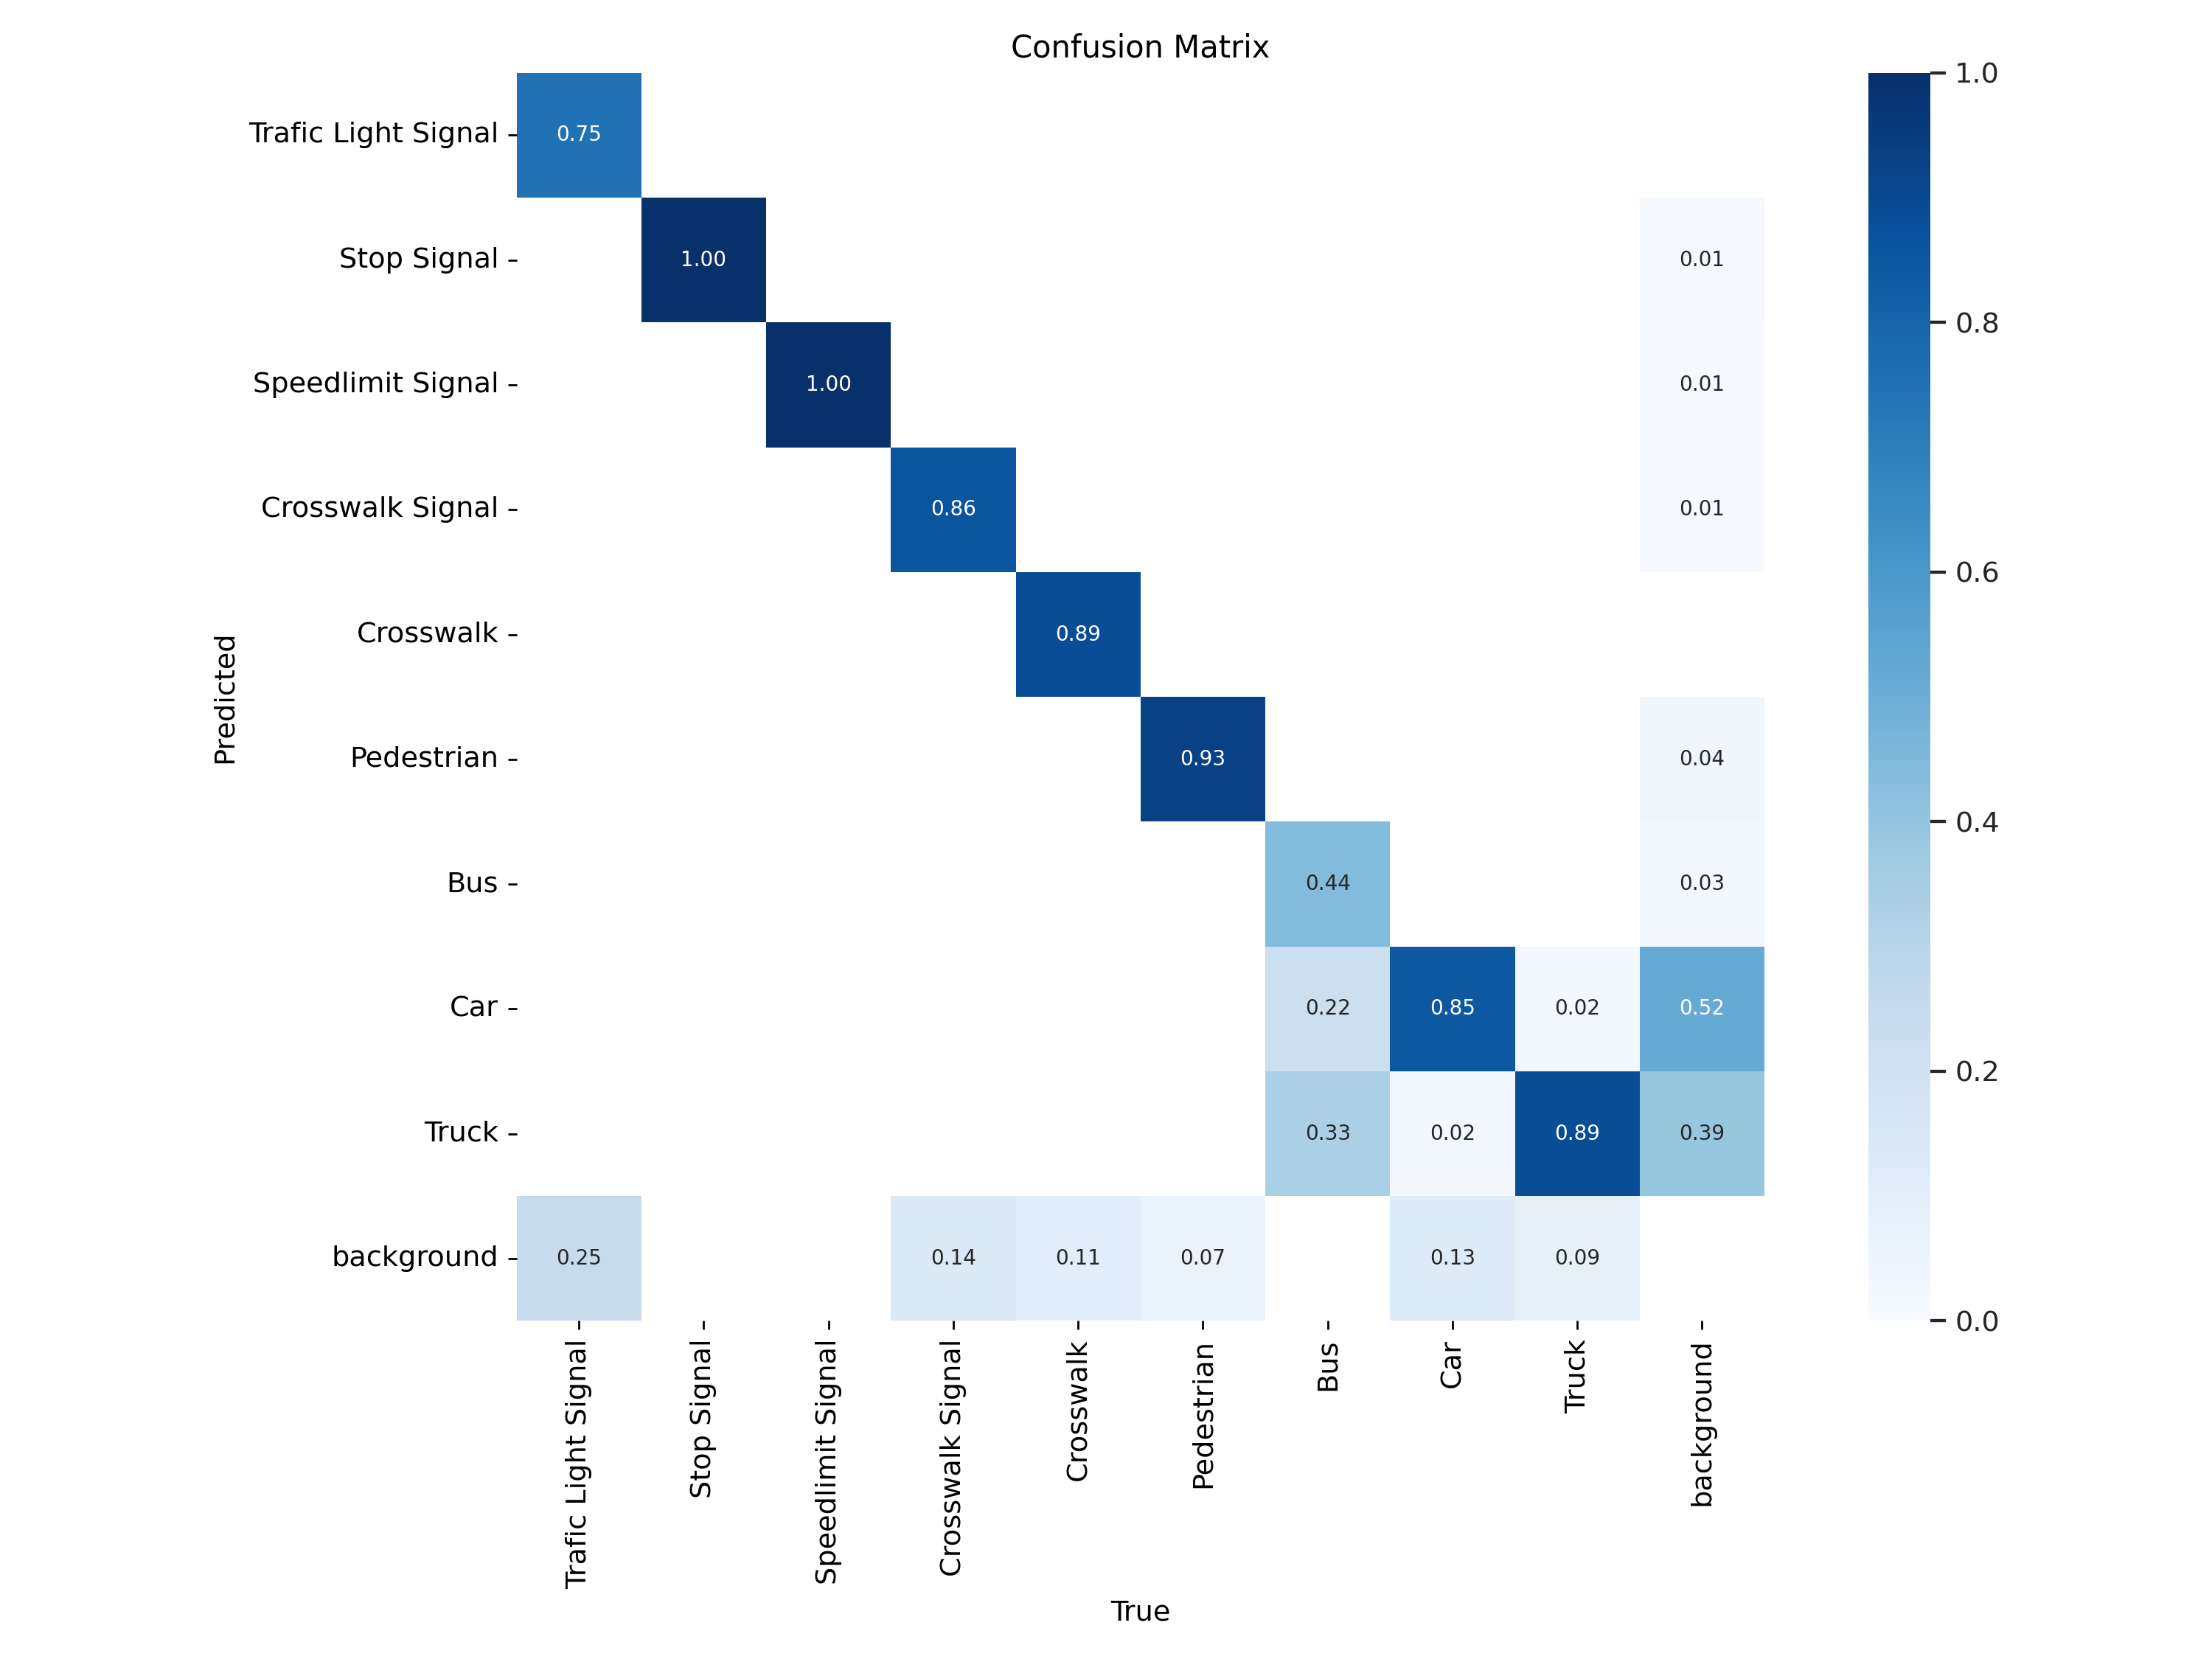

val label image

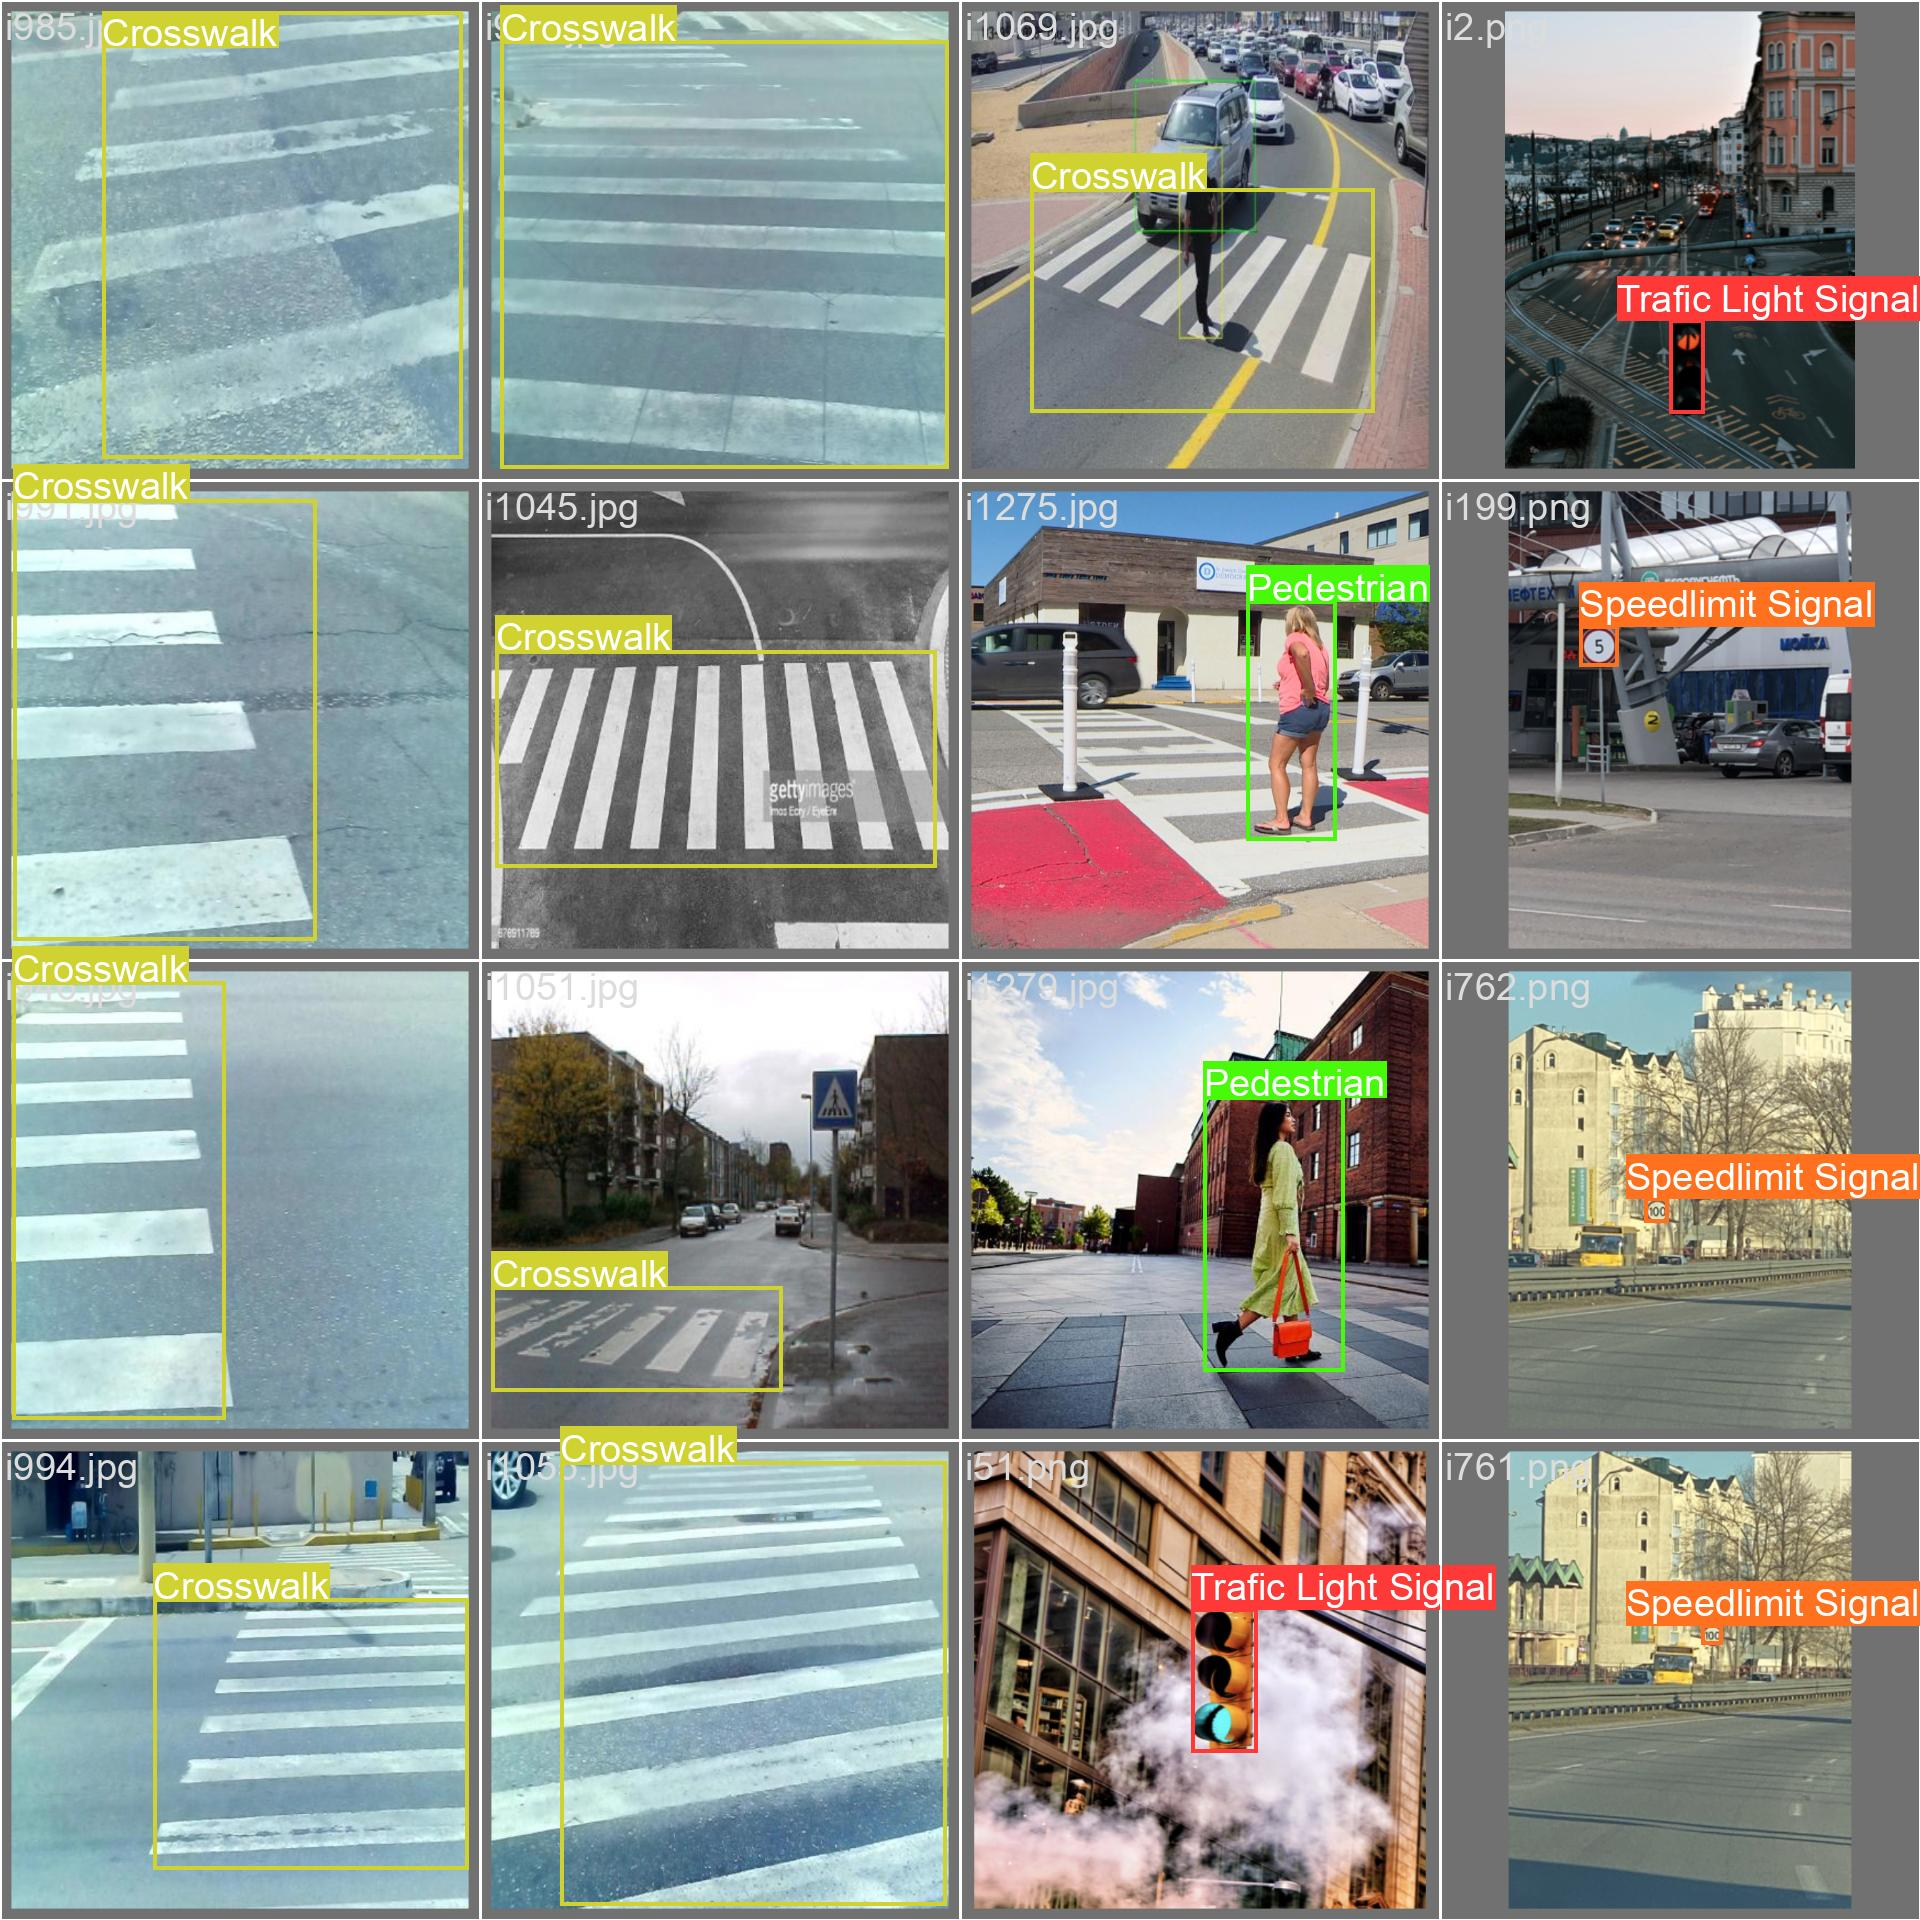

val predict

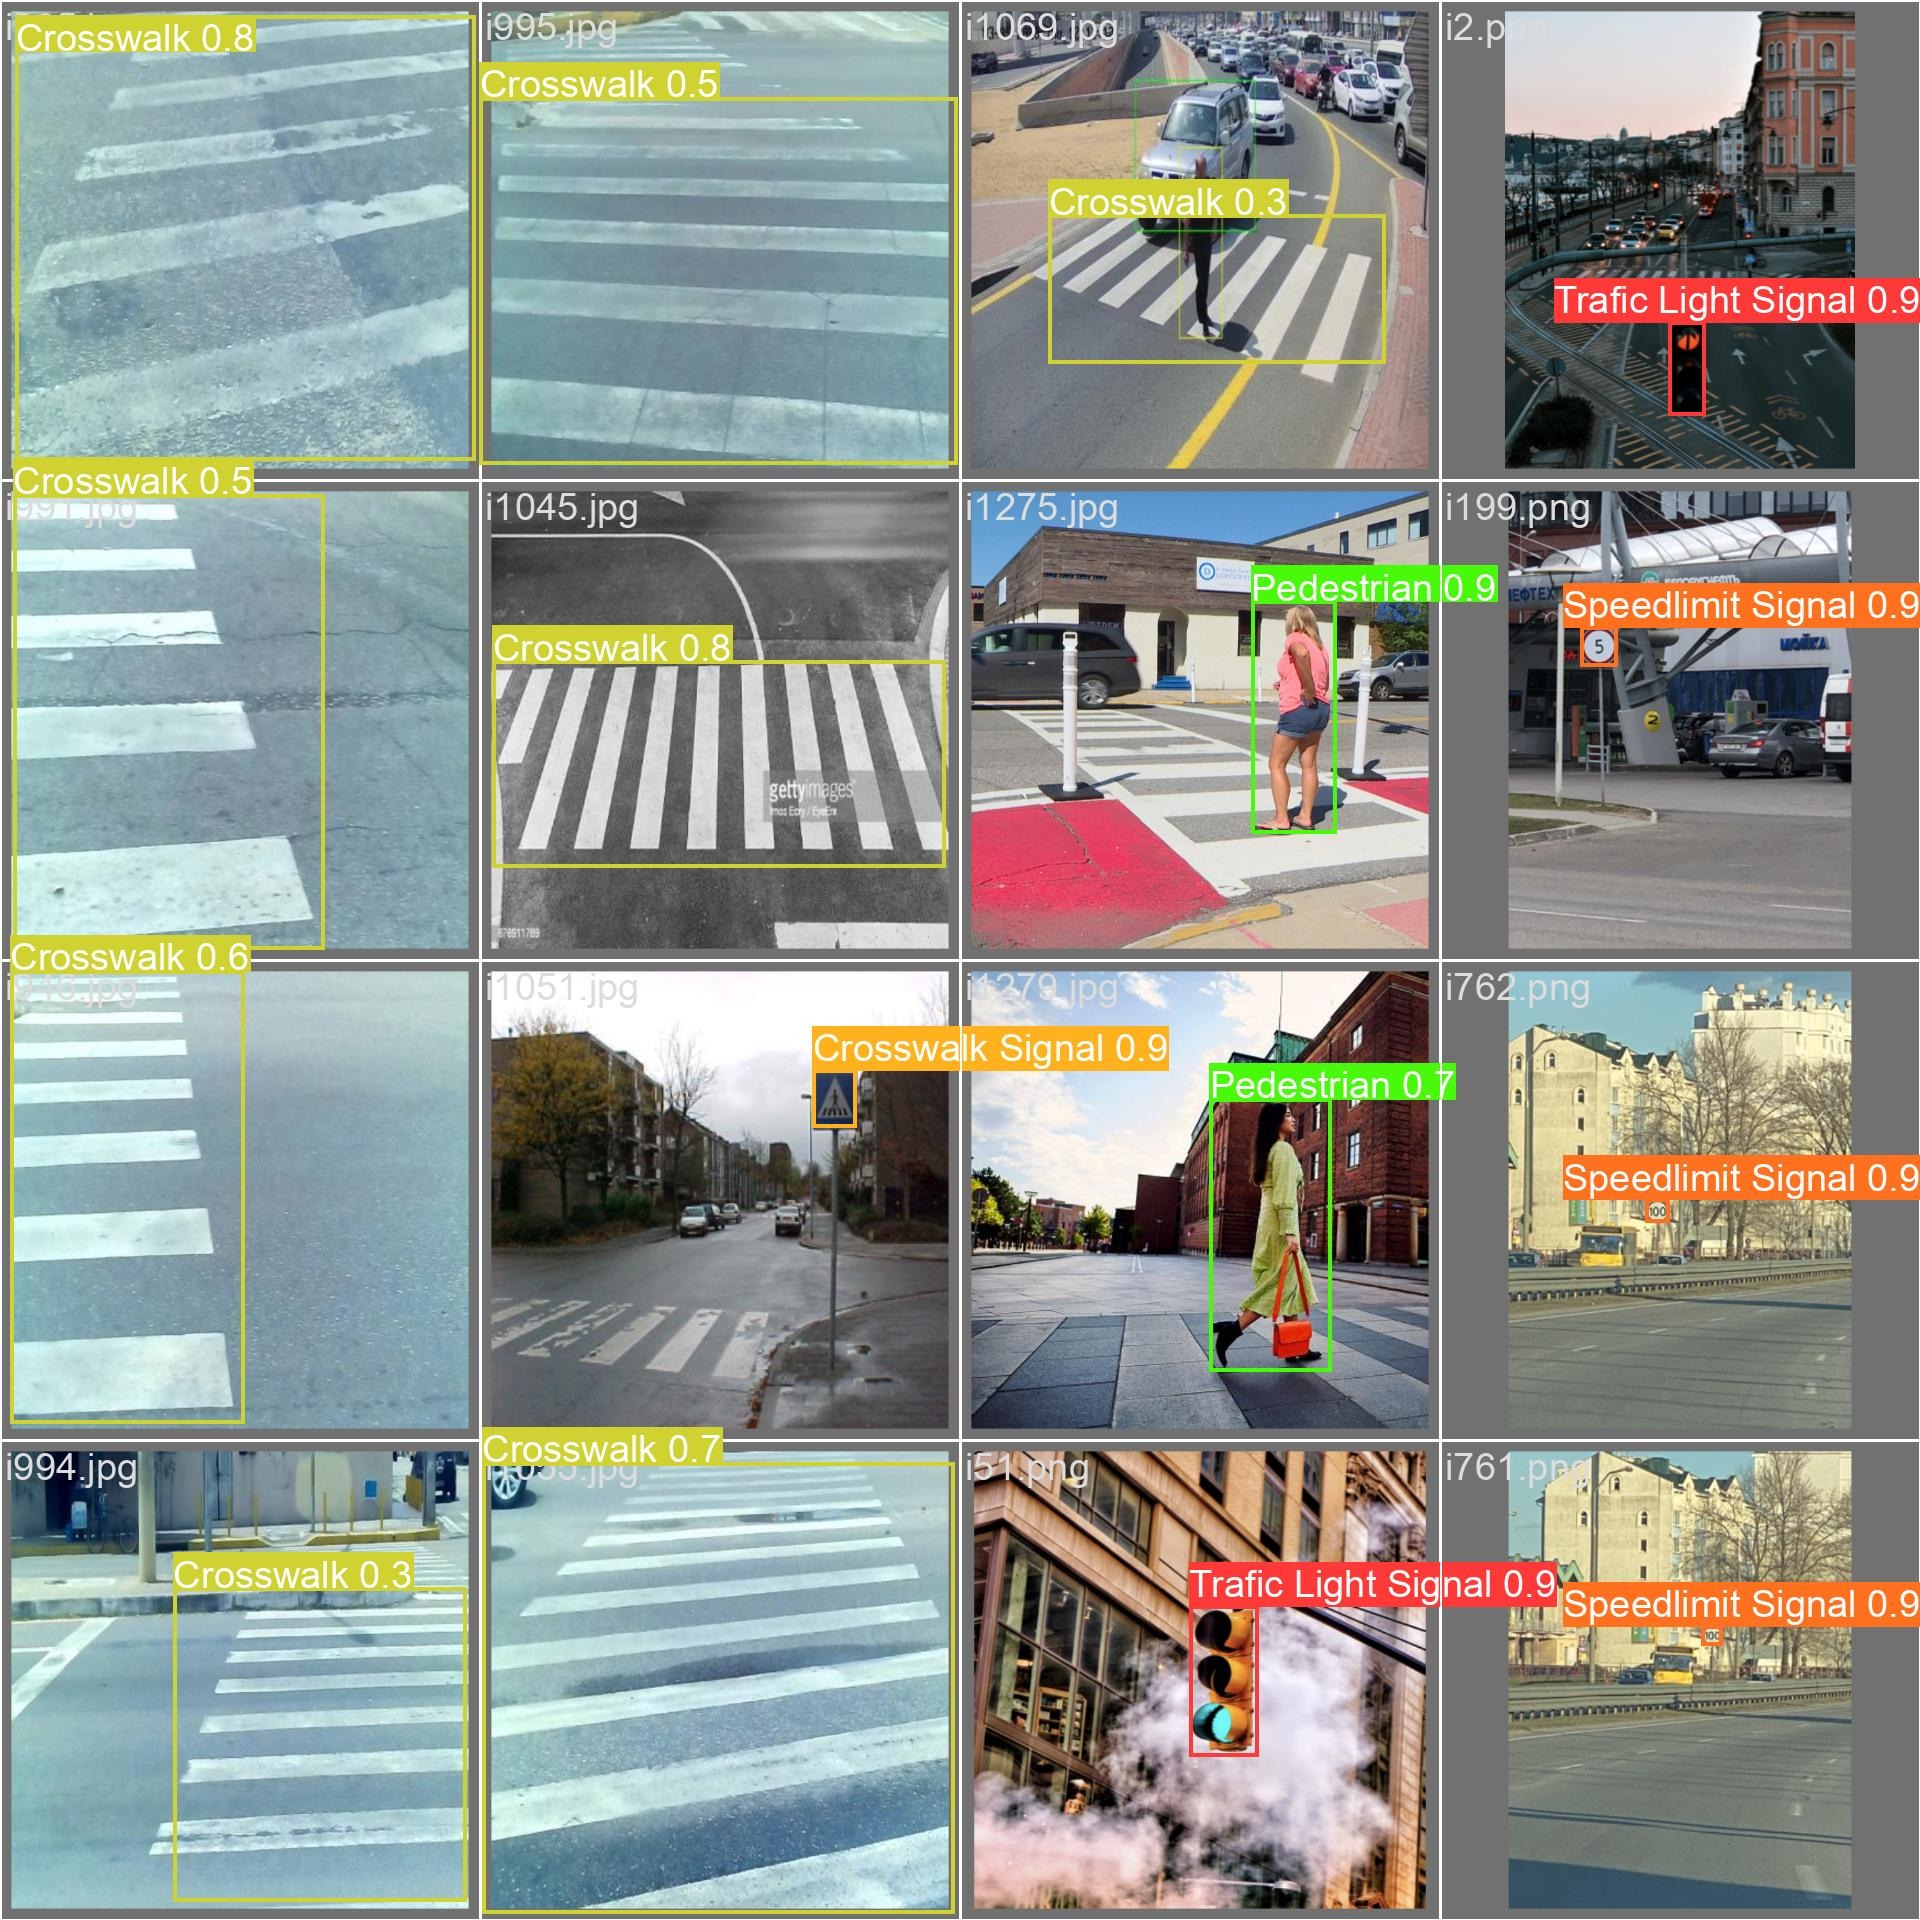

## Predict

In [ ]:
import cv2
import numpy as np
import os
import yaml
from yaml.loader import SafeLoader


class YOLO_Pred():
    def __init__(self,onnx_model,data_yaml):
        # load YAML
        with open(data_yaml,mode='r') as f:
            data_yaml = yaml.load(f,Loader=SafeLoader)

        self.labels = data_yaml['names']
        self.nc = data_yaml['nc']

        # load YOLO model
        self.yolo = cv2.dnn.readNetFromONNX(onnx_model)
        self.yolo.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
        self.yolo.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)



    def predictions(self,image):

        row, col, d = image.shape
        # get the YOLO prediction from the the image
        # step-1 convert image into square image (array)
        max_rc = max(row,col)
        input_image = np.zeros((max_rc,max_rc,3),dtype=np.uint8)
        input_image[0:row,0:col] = image
        # step-2: get prediction from square array
        INPUT_WH_YOLO = 640
        blob = cv2.dnn.blobFromImage(input_image,1/255,(INPUT_WH_YOLO,INPUT_WH_YOLO),swapRB=True,crop=False)
        self.yolo.setInput(blob)
        preds = self.yolo.forward() # detection or prediction from YOLO

        # Non Maximum Supression
        # step-1: filter detection based on confidence (0.4) and probability score (0.25)
        detections = preds[0]
        boxes = []
        confidences = []
        classes = []

        # widht and height of the image (input_image)
        image_w, image_h = input_image.shape[:2]
        x_factor = image_w/INPUT_WH_YOLO
        y_factor = image_h/INPUT_WH_YOLO

        for i in range(len(detections)):
            row = detections[i]
            confidence = row[4] # confidence of detection an object
            if confidence > 0.4:
                class_score = row[5:].max() # maximum probability from 20 objects
                class_id = row[5:].argmax() # get the index position at which max probabilty occur

                if class_score > 0.25:
                    cx, cy, w, h = row[0:4]
                    # construct bounding from four values
                    # left, top, width and height
                    left = int((cx - 0.5*w)*x_factor)
                    top = int((cy - 0.5*h)*y_factor)
                    width = int(w*x_factor)
                    height = int(h*y_factor)

                    box = np.array([left,top,width,height])

                    # append values into the list
                    confidences.append(confidence)
                    boxes.append(box)
                    classes.append(class_id)

        # clean
        boxes_np = np.array(boxes).tolist()
        confidences_np = np.array(confidences).tolist()

        # NMS
        index = cv2.dnn.NMSBoxes(boxes_np,confidences_np,0.25,0.45).flatten()


        # Draw the Bounding
        for ind in index:
            # extract bounding box
            x,y,w,h = boxes_np[ind]
            bb_conf = int(confidences_np[ind]*100)
            classes_id = classes[ind]
            class_name = self.labels[classes_id]
            colors = self.generate_colors(classes_id)

            text = f'{class_name}: {bb_conf}%'

            cv2.rectangle(image,(x,y),(x+w,y+h),colors,2)
            cv2.rectangle(image,(x,y-30),(x+w,y),colors,-1)

            cv2.putText(image,text,(x,y-10),cv2.FONT_HERSHEY_PLAIN,0.7,(0,0,0),1)


        return image


    def generate_colors(self,ID):
        np.random.seed(10)
        colors = np.random.randint(100,255,size=(self.nc,3)).tolist()
        return tuple(colors[ID])


In [ ]:
yolo = YOLO_Pred('/teamspace/studios/this_studio/YOLOv5/yolov5/runs/train/Model/weights/best.onnx','/teamspace/studios/this_studio/YOLOv5/yolov5/dataset.yaml')


In [ ]:
!pip install matplotlib -q

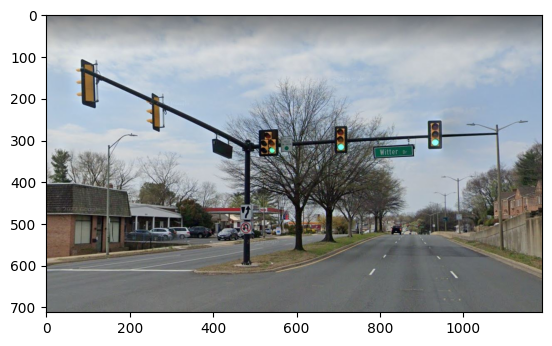

In [ ]:
img = cv2.imread('/teamspace/studios/this_studio/YOLOv5/yolov5/Wittier_traffic_signals.jpg')
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(image)

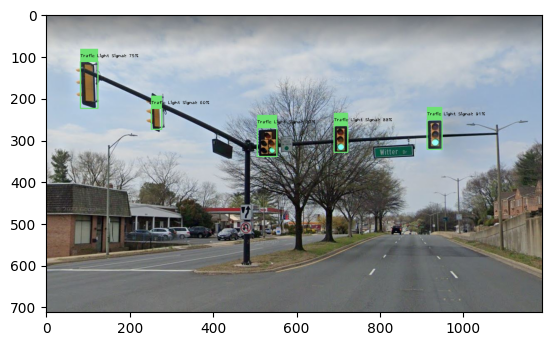

In [ ]:
image_pred = yolo.predictions(image)

plt.imshow(image_pred)